<img src="../fasp/runner/credits/images/FullHouse.png" style="float: right;">

### SRA DRS server - identify specific file via Search

Compare this with the other version of FASPNotebook6 which unpacks a DRS bundle

In [1]:
#  IMPORTS
import sys
import datetime

# a utility 
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.search import DataConnectClient
from fasp.loc import SRADRSClient
from fasp.workflow import DNAStackWESClient

# Step 1 - Discovery
# query for relevant DRS objects
searchClient = DataConnectClient('https://publisher-data.publisher.dnastack.com/data-connect/')

query = '''
SELECT f.sample_name, drs_id bam_drs_id, acc
FROM collections.public_datasets.onek_genomes_ssd_drs s 
JOIN collections.public_datasets.onek_genomes_sra_drs_files f 
    ON f.sample_name = s.su_submitter_id 
WHERE filetype = 'bam'
    AND mapped = 'mapped' 
    AND sequencing_type ='exome'
    AND  population = 'JPT'
LIMIT 3
'''

In [4]:
# Set up a client to access NCBI's  DRS Server for the Sequence Read Archive (SRA)
drsClient = SRADRSClient('https://locate.be-md.ncbi.nlm.nih.gov', 's3.us-east-1', public=True)

# Step 3 - set up a class that run a compute for us
wesClient = DNAStackWESClient('~/.keys/dnastack_wes_credentials.json')

# A log is helpful to keep track of the computes we've submitted
fasp_runner = FASPRunner(program='FASPNotebook06-copy2')

fasp_runner.configure(searchClient, drsClient, wesClient)
fasp_runner.runQuery(query, 'SRA DRS 1k Genomes')


Running query
SELECT f.sample_name, drs_id bam_drs_id, acc
FROM thousand_genomes.onek_genomes.ssd_drs s 
join thousand_genomes.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 
where filetype = 'bam' and mapped = 'mapped' 
and sequencing_type ='exome' and  population = 'JPT' LIMIT 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
subject=NA18948, drsID=fb1cfb04d3ef99d07c21f9dbf87ccc68
s3.us-east-1
[{'access_id': 'b5f46aadbcb48d7141104db0440feb63cd4e61c8', 'region': 's3.us-east-1', 'type': 'https'}, {'access_id': '1bc0bc010f0edf4ef18af594acdba5db864db67e', 'region': 'gs.US', 'type': 'https'}, {'access_id': '722d3466edf7ad5f6797f9774e21b368c45ad5b1', 'type': 'https'}]
workflow submitted, run:41af061d-4dc9-4d4d-9eb2-d18dbd975e41
____________________________________________________________
subject=NA18945, drsID=9327fb44eb81b49a41e38c8d86eb3b3a
s3.us

[{'subject': 'NA18948', 'run_id': '41af061d-4dc9-4d4d-9eb2-d18dbd975e41'},
 {'subject': 'NA18945', 'run_id': '810f059b-72dd-4b15-bbd8-41a6c8977e7e'},
 {'subject': 'NA18943', 'run_id': 'c44f3d05-42ca-4987-8768-e6a3a67d7b98'}]

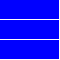

In [5]:
fasp_runner.getFASPicon()